# test-17: NACA

LogCircular 1:10 GO (FLUX)

23rd Jan 2025

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def make_plots(file_name, reference_file_name=None, show_conservative=False, exact_value=None, reference_value = None, sup_title=None, print_table=False):
    data = pd.read_csv(file_name)
    data['std FLUX err'] = None

    if exact_value is not None:
        data['est err'] = data['est err'] / exact_value
    
    if reference_value is not None:
        data['est err'] = data['est err'] / reference_value
        data['std FLUX err'] = abs(data['std FLUX value']-reference_value)/ reference_value     # Problem: std FLUX err is not a key of the df yet.


    pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
    if(print_table):
        print(data)

    if reference_file_name is not None:
        reference_data = pd.read_csv(reference_file_name)
        reference_data['std FLUX err'] = None
        if exact_value is not None:
            reference_data['est err'] = reference_data['est err'] / exact_value
        if reference_value is not None:
            reference_data['est err'] = reference_data['est err'] / reference_value
            reference_data['std FLUX err'] = abs(reference_data['std FLUX value']-reference_value)/ reference_value


    if reference_value is not None:
        dofs = int(list(data['DoFs'])[-1])
        max_dofs = dofs/8
        data = data[data['DoFs']<max_dofs]
        if reference_file_name is not None:
            reference_data = reference_data[reference_data['DoFs']<max_dofs]

    # Creazione della figura con due subplot
    fig, axes = plt.subplots(1, 2, figsize=(13, 6))

    # Primo subplot
    axes[0].loglog(data['DoFs'], data['std FLUX err'], "r-+", linewidth=1.0, label='Exact Error (std)')
    axes[0].loglog(data['DoFs'], data['est err'], "g-+", linewidth=1.0, label='Estimated Error')
    if reference_file_name is not None:
        axes[0].loglog(reference_data['DoFs'], reference_data['std FLUX err'], "b-+", linewidth=0.3, label='GlobRef exact error (std) (Reference)')
        #axes[0].loglog(reference_data['DoFs'], reference_data['est err'], "b-+", linewidth=0.3, label='GlobRef exact error (std) (Reference)')

    if show_conservative:
        axes[0].loglog(data['DoFs'], data['Cons. FLUX err'], "r:+", linewidth=1.0, label='Exact Error (cons)')
        if reference_file_name is not None:
            axes[0].loglog(reference_data['DoFs'], reference_data['Cons. FLUX err'], "b:+", linewidth=0.5, label='GlobRef exact error (cons) (Reference)')

    axes[0].set_xlabel('Degrees of Freedom (DoFs)', fontsize=12)
    axes[0].set_ylabel('Relative error' if ((exact_value is not None) or (reference_value is not None)) else 'Absolute error', fontsize=12)
    axes[0].set_title('Exact vs Estimated FLUX error', fontsize=14)
    axes[0].legend()
    axes[0].grid(True, which="both", linestyle='--', linewidth=0.5)

    # Secondo subplot
    if reference_value is not None:
        axes[1].loglog(data['DoFs'], data['std FLUX err'], "r-+", linewidth=0.5, label='Exact Error')
        axes[1].loglog(data['DoFs'], abs(data['std FLUX err'] - data["est err"]), "y-+", linewidth=0.5, label='Error in [computed value + estimated error]')
        axes[1].set_xlabel('Degrees of Freedom (DoFs)', fontsize=12)
        axes[1].set_title('Exact error and residual', fontsize=14)
        axes[1].legend()
        axes[1].grid(True, which="both", linestyle='--', linewidth=0.5)

    # Aggiunta del titolo comune
    if sup_title:
        fig.suptitle(sup_title, fontsize=16)

    # Miglior layout e mostra il grafico
    fig.tight_layout(rect=[0, 0, 1, 0.95])  # Lascia spazio per il titolo principale
    plt.show()

Comaparison: Global refinements vs Flux goal-oriented

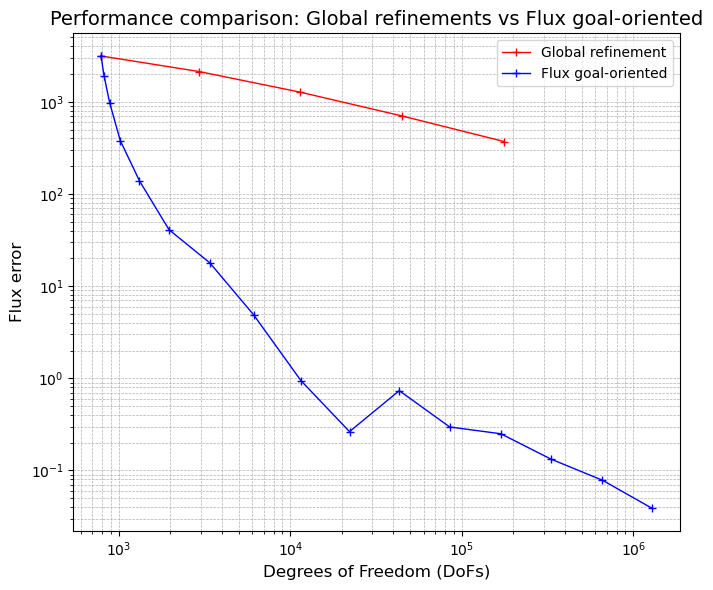

    cycle    cells     DoFs      est err
0       0      686      789  3142.967325
1       1      710      821  1927.283009
2       2      758      885   981.508443
3       3      860     1022   378.528139
4       4     1091     1322   138.710519
5       5     1583     1965    40.974791
6       6     2720     3402    17.870448
7       7     4856     6119     4.890385
8       8     9185    11564     0.941594
9       9    17627    22177     0.264156
10     10    34298    43259     0.734539
11     11    67667    85128     0.296439
12     12   134552   169137     0.250311
13     13   264317   332291     0.132606
14     14   526520   660946     0.078488
15     15  1030874  1294769     0.038692


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

glob_file_name = "./results/config-1/convergence_results.csv"
fGO_file_name = "./results/config-2/convergence_results.csv"

glob_data = pd.read_csv(glob_file_name)
fGO_data = pd.read_csv(fGO_file_name)

plt.figure(figsize=(7, 6))  # Adjust the figure size for two plots

plt.subplot(1, 1, 1)  # Second subplot (bottom)
plt.loglog(glob_data['DoFs'], glob_data['est err'],"r-+", linewidth=1.0, label='Global refinement')

plt.loglog(fGO_data['DoFs'], fGO_data['est err'],"b-+", linewidth=1.0, label='Flux goal-oriented')

plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Flux error', fontsize=12)
plt.title('Performance comparison: Global refinements vs Flux goal-oriented', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

print(fGO_data)

Our best setup is mesh myWW.msh, MappingQ2, TransfiniteInterpoaltionManifold.
config-3,-4

    cycle   cells    DoFs      POINT value   std FLUX value          est err  \
0       0     232     259 1.1462821282e+04 1.0521003949e+04 6.9652041462e+03   
1       1     280     323 1.1332533029e+04 1.4882537688e+04 5.4771361045e+03   
2       2     376     451 1.1297860902e+04 1.8455429645e+04 3.4007582420e+03   
3       3     598     739 1.1226294830e+04 2.0840668592e+04 1.6092756840e+03   
4       4    1066    1338 1.1045326296e+04 2.1987468363e+04 6.3892429124e+02   
5       5    1987    2543 1.0858058381e+04 2.2420192814e+04 2.2896821157e+02   
6       6    3880    5048 1.0828199307e+04 2.2506293680e+04 1.4336915076e+02   
7       7    7870   10011 1.0765840504e+04 2.2568373296e+04 7.8985663102e+01   
8       8   14785   18974 1.0755734056e+04 2.2613474429e+04 3.3646202820e+01   
9       9   28720   36460 1.0736735413e+04 2.2631032361e+04 1.5669971302e+01   
10     10   53827   68340 1.0728961207e+04 2.2633988923e+04 1.2553344655e+01   
11     11  101020  126862 1.0724926988e+

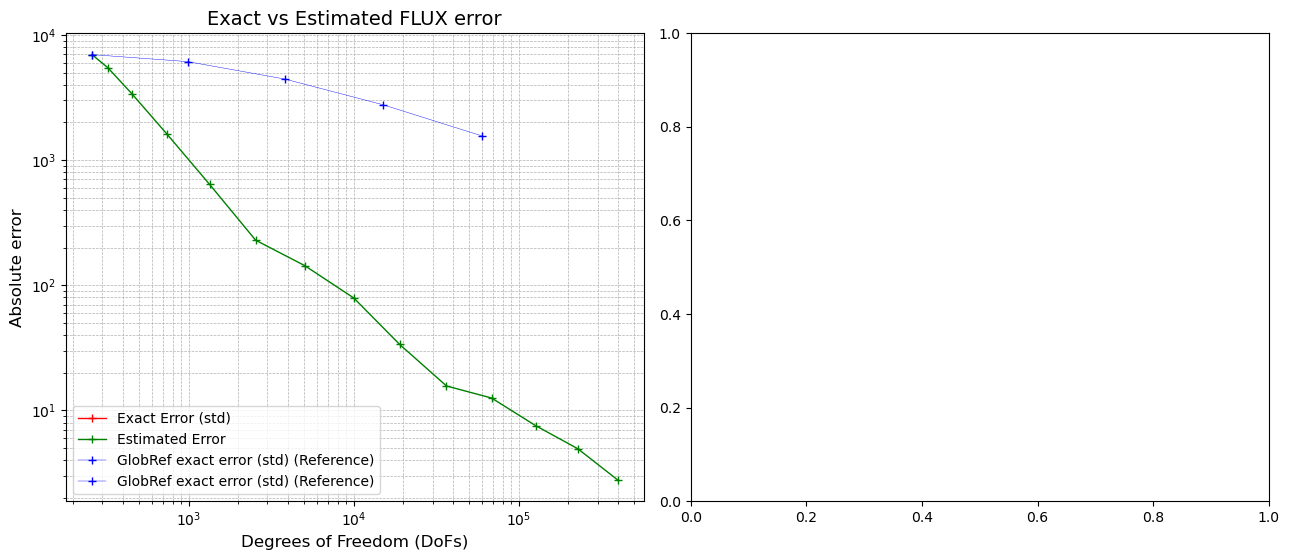

In [28]:
make_plots("./results/config-4/convergence_results.csv","./results/config-3/convergence_results.csv",show_conservative=False, print_table=True)

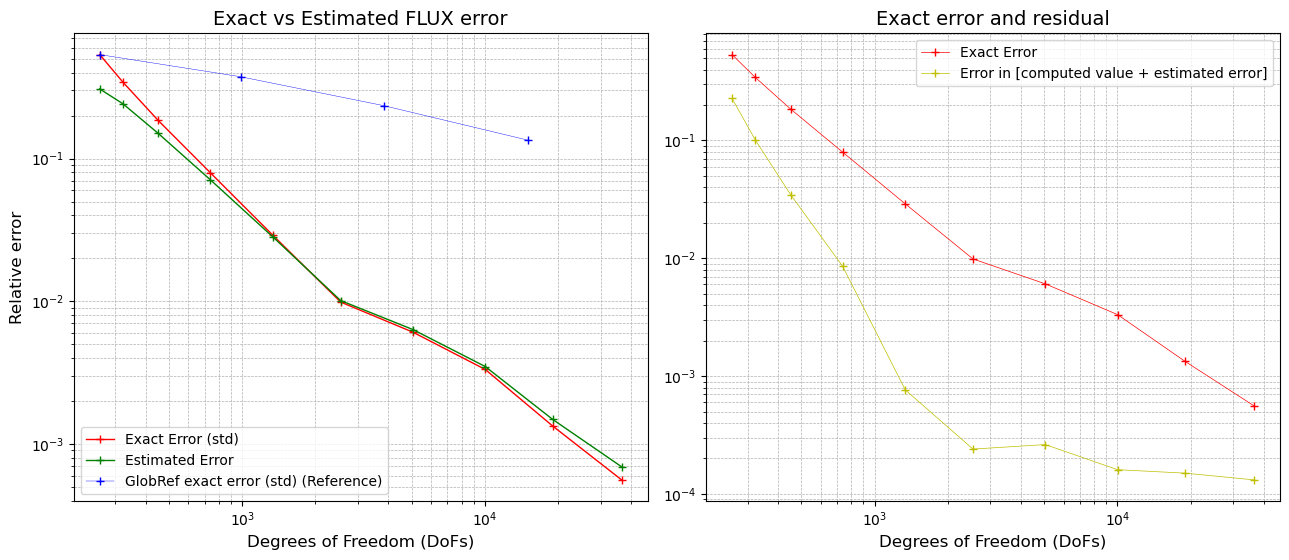

In [46]:
make_plots("./results/config-4/convergence_results.csv","./results/config-3/convergence_results.csv",reference_value=2.2643718917e+04)

    cycle   cells    DoFs      POINT value   std FLUX value          est err  \
0       0     174     197 1.1417193229e+04 1.0493933607e+04 6.7977355408e+03   
1       1     222     261 1.1302850851e+04 1.4566291192e+04 5.7369522892e+03   
2       2     318     389 1.1265626157e+04 1.8178846902e+04 3.7475901469e+03   
3       3     516     654 1.1055892120e+04 2.0756188987e+04 1.8242273899e+03   
4       4     975    1270 1.1163775224e+04 2.2038132125e+04 6.5612017024e+02   
5       5    1860    2374 1.0850609654e+04 2.2167610228e+04 4.9930123068e+02   
6       6    3516    4592 1.0865490819e+04 2.2442860349e+04 2.0593711739e+02   
7       7    6762    8717 1.0776913077e+04 2.2513311084e+04 1.3267506065e+02   
8       8   12564   16196 1.0752066627e+04 2.2564359907e+04 8.2325840820e+01   
9       9   23400   29661 1.0736189112e+04 2.2596003303e+04 5.0401472489e+01   
10     10   41025   51554 1.0729133895e+04 2.2615981551e+04 3.0535621297e+01   
11     11   68550   86756 1.0726295697e+

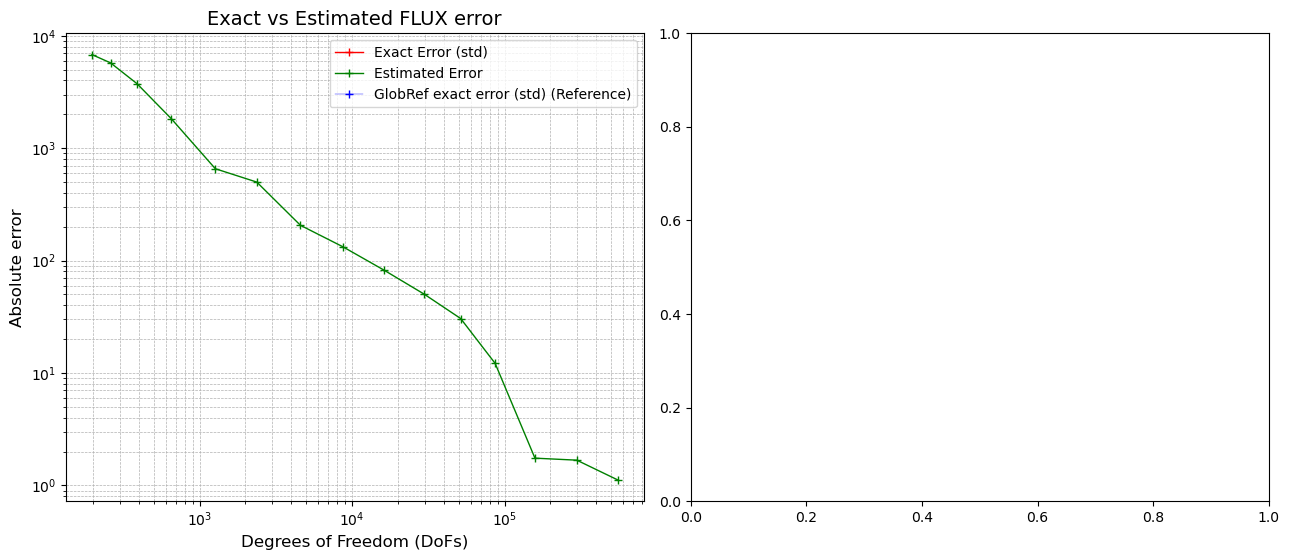

In [50]:
make_plots("./results/config-6/convergence_results.csv","./results/config-5/convergence_results.csv",print_table=True)

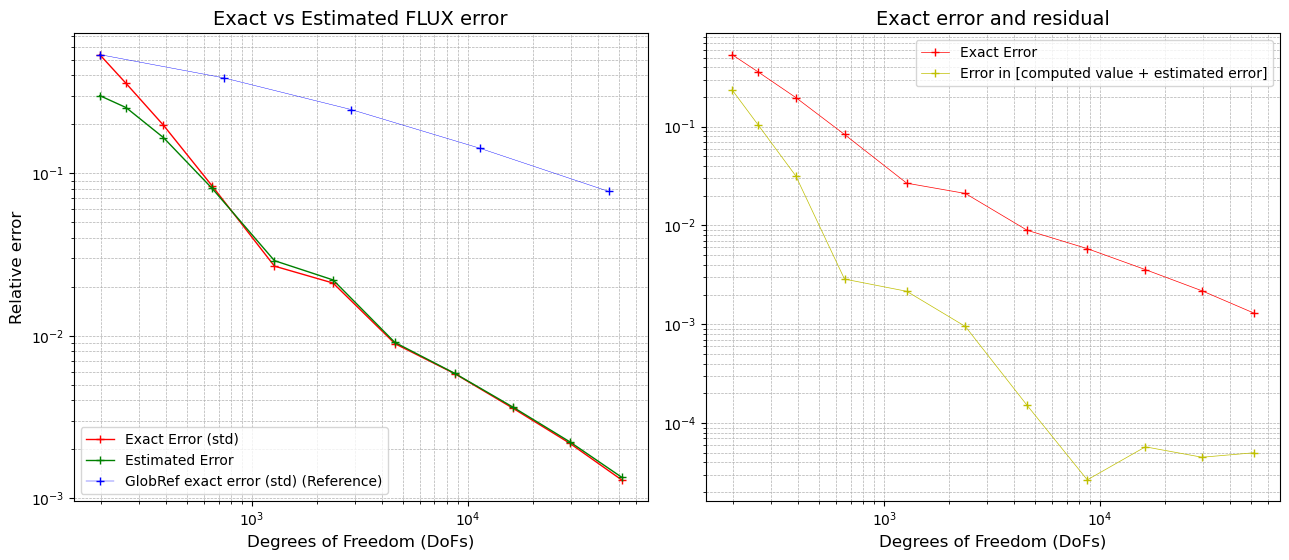

In [51]:
make_plots("./results/config-6/convergence_results.csv","./results/config-5/convergence_results.csv",reference_value=2.2645382796e+04)

    cycle   cells    DoFs      POINT value   std FLUX value          est err  \
0       0     174     197 1.1627954926e+04 1.0771319219e+04 6.8558863689e+03   
1       1     222     261 1.1492682239e+04 1.5232503779e+04 5.2907244686e+03   
2       2     321     394 1.1460622152e+04 1.8887899324e+04 3.1402617118e+03   
3       3     579     732 1.1221317209e+04 2.1161721089e+04 1.4196140360e+03   
4       4    1074    1361 1.1079291959e+04 2.2145884614e+04 5.9999609308e+02   
5       5    2031    2593 1.0909638535e+04 2.2466757784e+04 2.1431824320e+02   
6       6    3969    5190 1.0821011951e+04 2.2533518502e+04 1.1710312357e+02   
7       7    8433   10645 1.0780733578e+04 2.2568552298e+04 7.7940308133e+01   
8       8   15882   20286 1.0757115205e+04 2.2615071663e+04 3.1967229558e+01   
9       9   29568   37309 1.0739193813e+04 2.2628410685e+04 1.8137627958e+01   
10     10   56043   71108 1.0730770603e+04 2.2637311669e+04 9.2482300409e+00   
11     11  105834  132274 1.0725560520e+

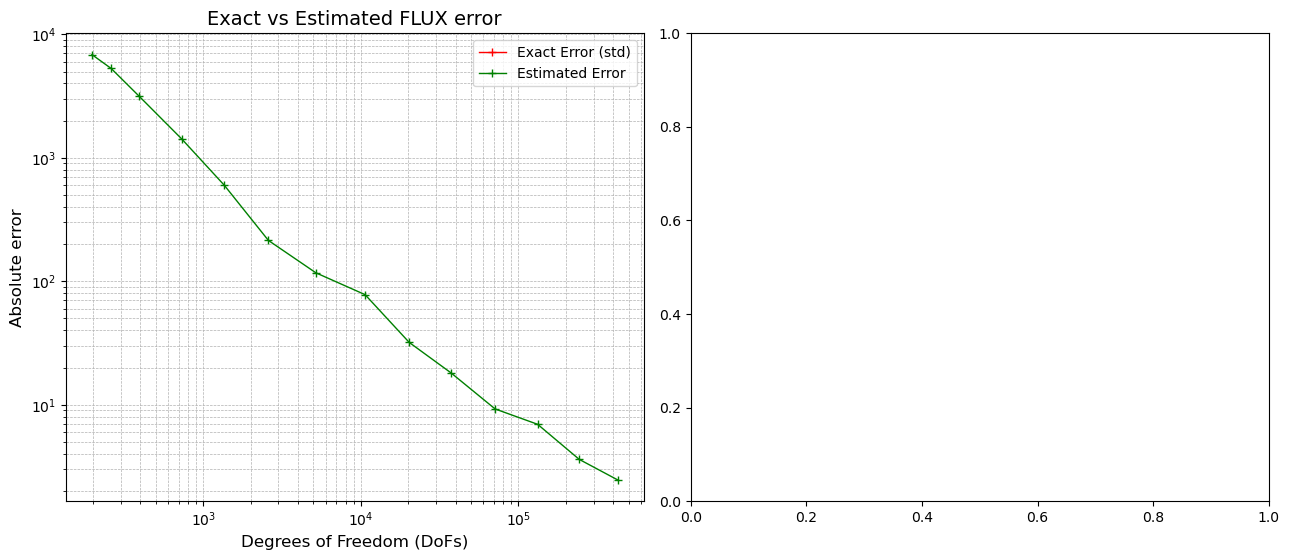

In [55]:
make_plots("./results/config-8/convergence_results.csv",print_table=True)

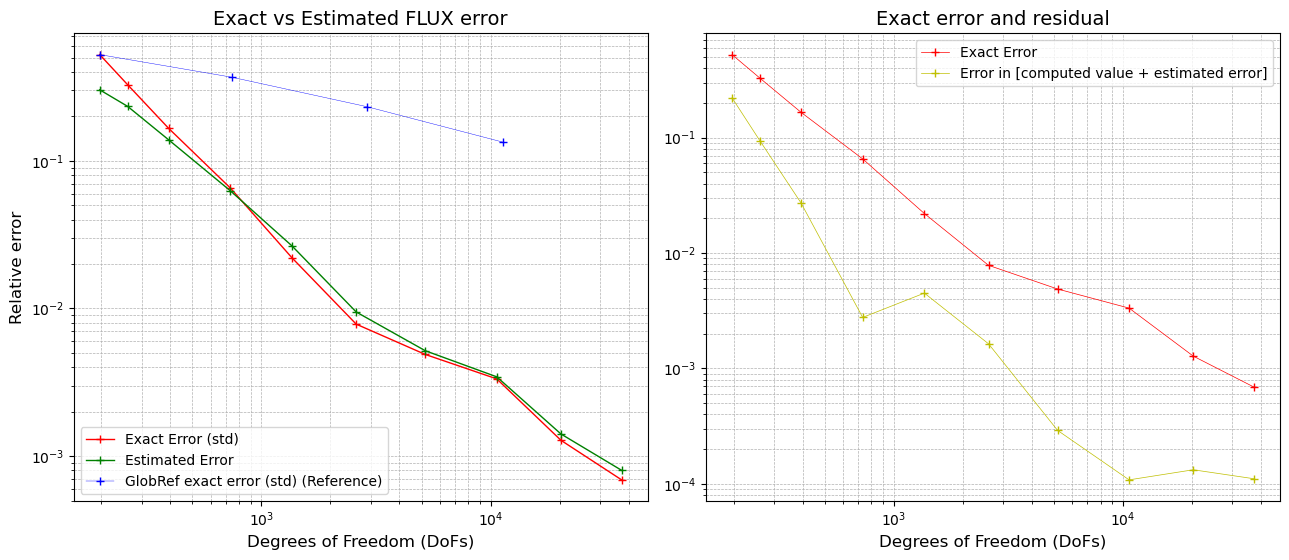

In [59]:
make_plots("./results/config-8/convergence_results.csv","./results/config-7/convergence_results.csv",reference_value=2.2644039005e+04)